<a href="https://colab.research.google.com/github/caalr11/FisicaComputacional1/blob/master/Evaluacion2/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EVALUACION 2: CARLOS ANDRES ARIAS LOPEZ REYES

Se pide resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función odeint de scipy.integrate.

La ecuación diferencial del oscilador amortiguado es

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}$$
donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

$$\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}$$
y $\zeta$ es la tasa de amortiguamiento dado por la expresión

$$\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}$$
siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire.

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$).

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:

Movimiento sobreamortiguado ($\zeta &gt; 1$). El sistema decae exponencialmente al estado estacionario sin oscilar.
Críticamente amortiguado ($\zeta = 1$).
Movimiento subamortiguado ($\zeta &lt; 1$). Movimiento periódico que decae exponencialmente.
Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.
Problema1.

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) &lt; 0, x'(0) = 0$.

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$:

2nd_Order_Damping_Ratios.png

Problema 2.

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

Beats-Resonances.png

Problema 3.

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

In [13]:
#Problema 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

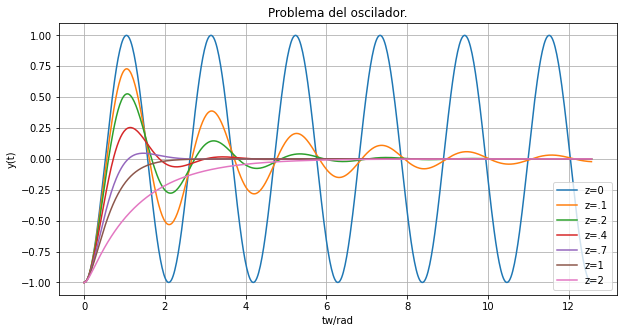

In [14]:
#Oscilador amortiguado con F=0
def ode(y, t, z, o0):
    x, dxdt = y
    dydt = -2*z*o0*dxdt - (o0**2)*x
    return [dxdt, dydt]
t0=0
tmax=4*np.pi
Npts=600
t = np.linspace(t0,tmax,Npts)

t_0 = 0.0
y_0 = [-1.0, 0.0]

#Casos diferentes
z0 = 0.0
z1 = 0.1
z2 = 0.2
z3 = 0.4
z4 = 0.7
z5 = 1.0
z6 = 2.0
# frecuencia angular del oscilador
o0 = np.sqrt(9/1) 
# soluciones
sol0 = odeint(ode, y_0, t, args=(z0,o0,))
sol1 = odeint(ode, y_0, t, args=(z1,o0,))
sol2 = odeint(ode, y_0, t, args=(z2,o0,))
sol3 = odeint(ode, y_0, t, args=(z3,o0,))
sol4 = odeint(ode, y_0, t, args=(z4,o0,))
sol5 = odeint(ode, y_0, t, args=(z5,o0,))
sol6 = odeint(ode, y_0, t, args=(z6,o0,))
plt.figure(figsize=(10,5))
plt.grid()
plt.title("Problema del oscilador.")
plt.xlabel('tw/rad')
plt.ylabel('y(t)')

plt.plot(t, sol0[:,0], label='z=0')
plt.plot(t, sol1[:,0], label='z=.1')
plt.plot(t, sol2[:,0], label='z=.2')
plt.plot(t, sol3[:,0], label='z=.4')
plt.plot(t, sol4[:,0], label='z=.7')
plt.plot(t, sol5[:,0], label='z=1')
plt.plot(t, sol6[:,0], label='z=2')

plt.legend(loc='lower right')
plt.show()

In [15]:
#PROBLEMA 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

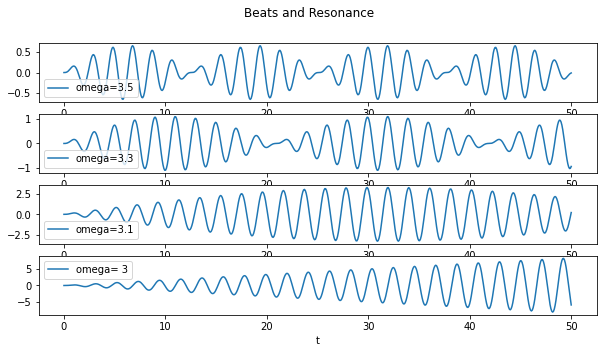

In [16]:
#oscilador amortiguado con F=1 y 1/m=1 
def ode(y, t, z, o0, of):
    x, dxdt = y
    dydt = -2*z*o0*dxdt - o0**2*x + np.sin(of*t)
    return [dxdt, dydt]
t0=0
tmax=50
Npts=600
t = np.linspace(t0,tmax,Npts)
t_0 = 0.0
y_0 = [0.0, 0.0]
z= 0.0 
o0 = np.sqrt(9/1) # frecuencia angular natural del oscilador
of1 = 3.5
of2 = 3.3
of3 = 3.1
of4 = 3.0
# soluciones
sol1 = odeint(ode, y_0, t, args=(z,o0,of1,))
sol2 = odeint(ode, y_0, t, args=(z,o0,of2,))
sol3 = odeint(ode, y_0, t, args=(z,o0,of3,))
sol4 = odeint(ode, y_0, t, args=(z,o0,of4,))

fig, axs = plt.subplots(4,figsize=(10,5))
fig.suptitle('Beats and Resonance')
axs[0].plot(t, sol1[:,0], label='omega=3.5')
axs[1].plot(t, sol2[:,0], label='omega=3.3')
axs[2].plot(t, sol3[:,0], label='omega=3.1')
axs[3].plot(t, sol4[:,0], label='omega= 3')

plt.xlabel('t')
axs[0].legend(loc='best');
axs[1].legend(loc='best');
axs[2].legend(loc='best');
axs[3].legend(loc='best');
plt.show()

In [17]:
#PROBLEMA 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

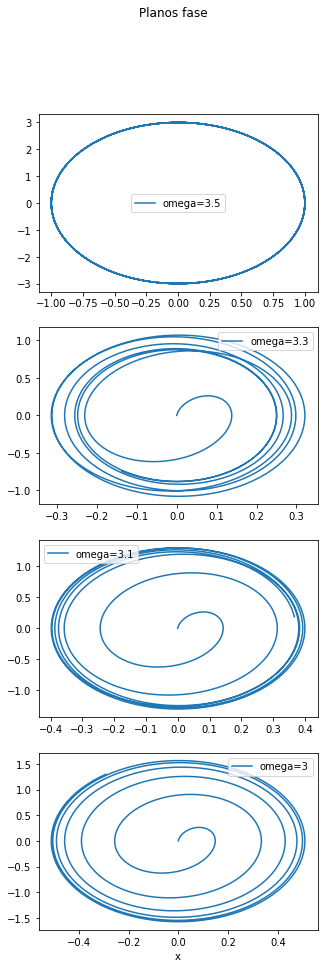

In [18]:
#oscilador amortiguado con F=1 y 1/m=1 
def ode(y, t, z, o0, of):
    x, dxdt = y
    dydt = -2*z*o0*dxdt - o0**2*x + np.sin(of*t)
    return [dxdt, dydt]
t0=0
tmax=4*np.pi
Npts=600
t = np.linspace(t0,tmax,Npts)
t_0 = 0.0
y_0 = [0.0, 0.0]

z=0.1
o0=np.sqrt(9/1)
of1 = 3.5
of2 = 3.3
of3 = 3.1
of4 = 3.0
#soluciones
sol1 = odeint(ode, y_0, t, args=(z,o0,of1,))
sol2 = odeint(ode, y_0, t, args=(z,o0,of2,))
sol3 = odeint(ode, y_0, t, args=(z,o0,of3,))
sol4 = odeint(ode, y_0, t, args=(z,o0,of4,))
fig, axs = plt.subplots(4,figsize=(5,15))
fig.suptitle('Planos fase')

axs[0].plot(sol0[:,0], sol0[:,1], label='omega=3.5')
axs[1].plot(sol1[:,0], sol1[:,1], label='omega=3.3')
axs[2].plot(sol2[:,0], sol2[:,1], label='omega=3.1')
axs[3].plot(sol3[:,0], sol3[:,1], label='omega=3')

plt.xlabel('x')
axs[0].legend(loc='best');
axs[1].legend(loc='best');
axs[2].legend(loc='best');
axs[3].legend(loc='best');
plt.show()